In [20]:
import pyVHR as vhr
import numpy as np
from pyVHR.analysis.pipeline import Pipeline
from pyVHR.plot.visualize import *
import os
import plotly.express as px
from pyVHR.utils.errors import getErrors, printErrors, displayErrors
import math

In [ ]:
def calc_ts_measures(measures):
    RR_list = measures['RR_list']
    RR_diff = measures['RR_diff']
    RR_sqdiff = measures['RR_sqdiff']
    measures['bpm'] = 60000 / np.mean(RR_list)
    measures['ibi'] = np.mean(RR_list)
    measures['sdnn'] = np.std(RR_list)
    measures['sdsd'] = np.std(RR_diff)
    measures['rmssd'] = np.sqrt(np.mean(RR_sqdiff))
    NN20 = [x for x in RR_diff if (x>20)]
    NN50 = [x for x in RR_diff if (x>50)]
    measures['nn20'] = NN20
    measures['nn50'] = NN50
    measures['pnn20'] = float(len(NN20)) / float(len(RR_diff))
    measures['pnn50'] = float(len(NN50)) / float(len(RR_diff))

In [17]:
def calc_RR(pulse, fs):
    peaklist = pulse
    measures={'RR_list':0,'RR_diff':0,'RR_sqdiff':0}
    RR_list = []
    cnt = 0
    while (cnt < (len(peaklist)-1)):
        RR_interval = (peaklist[cnt+1] - peaklist[cnt])
        ms_dist = ((RR_interval / fs) * 1000.0) 
        RR_list.append(ms_dist)
        cnt += 1
    RR_diff = []
    RR_sqdiff = []
    cnt = 0 
    while (cnt < (len(RR_list)-1)): 
        RR_diff.append(abs(RR_list[cnt] - RR_list[cnt+1])) 
        RR_sqdiff.append(math.pow(RR_list[cnt] - RR_list[cnt+1], 2))
        cnt += 1
    measures['RR_list'] = RR_list
    measures['RR_diff'] = RR_diff
    measures['RR_sqdiff'] = RR_sqdiff
    return measures

In [2]:
from matplotlib import pyplot as plt

In [ ]:
#cpu_CHROM, cpu_LGI, cpu_POS, cpu_PBV, cpu_PCA, cpu_GREEN, cpu_OMIT, cpu_ICA, cpu_SSR

In [29]:
#### TEST holistic approach

# params
roi_approach = 'holistic'   # 'holistic' or 'patches'
bpm_est = 'median'         # BPM final estimate, if patches choose 'medians' or 'clustering'
method = 'cpu_CHROM'       # one of the methods implemented in pyVHR
pipe = Pipeline()          # object to execute the pipeline
videoFileName= 'video.MP4'
wsize = 8
# run
bvps, timesES, bpmES = pipe.run_on_video(videoFileName,
                                        winsize=wsize, 
                                        roi_method='convexhull',
                                        roi_approach=roi_approach,
                                        method=method,
                                        estimate=bpm_est,
                                        patch_size=40, 
                                        RGB_LOW_HIGH_TH=(5,230),
                                        Skin_LOW_HIGH_TH=(5,230),
                                        pre_filt=True,
                                        post_filt=True,
                                        cuda=True, 
                                        verb=True
)



Processing Video video.MP4

 Video FPS 25.0

Roi processing...
 - Extraction approach: holistic
 - Number of windows: 14
 - Win size: (#ROI, #landmarks, #frames) =  (1, 3, 200)

Pre filtering...
 - Pre-filter applied: BPfilter

BVP extraction...
 - Extraction method: cpu_CHROM
 - Post-filter applied: BPfilter

BPM estimation...
 - roi appproach: holistic

...done!



In [30]:
bpmES

[82.03125,
 82.03125,
 82.03125,
 82.76367,
 82.03125,
 81.29883,
 81.29883,
 80.56641,
 79.10156,
 79.10156,
 79.833984,
 83.49609,
 85.69336,
 85.69336]

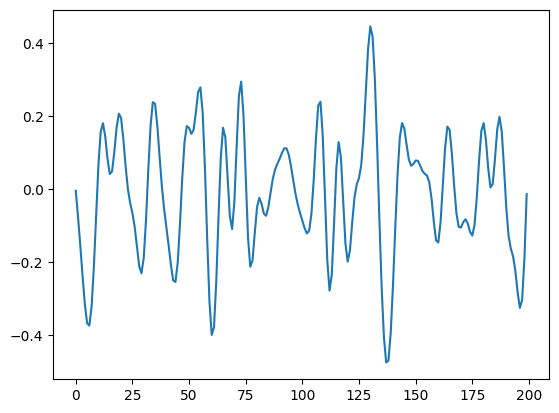

In [31]:
plt.plot(bvps[9][0])

In [32]:
from pyampd.ampd import find_peaks_adaptive
peaklist=find_peaks_adaptive(bvps[9][0])


In [33]:
RR_list=calc_RR(peaklist,fs=25)

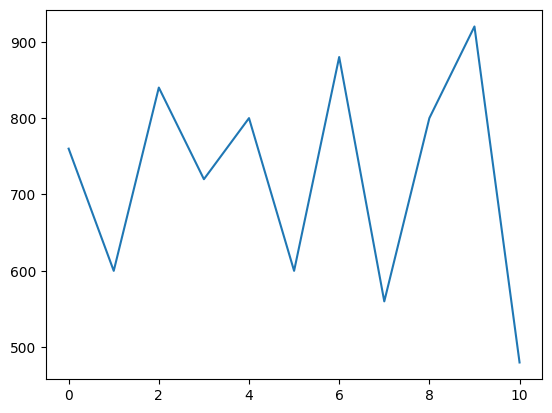

In [34]:
plt.plot(RR_list['RR_list'])

In [38]:
def rmssd(x):
    return np.sqrt(np.mean(np.diff(x) ** 2))
def sdsd(x):
    return st.stdev(np.diff(x))
    
def nni_50(x):
    return  sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100 * nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) > 20)

def pnni_20(x):
    return  100 * nni_20(x) / len(x)

def avg_hr(x):
    return  st.mean(60000/x)
def std_hr(x):
    return  st.stdev(60000/x)
def min_hr(x):
    return  min(60000/x)
def max_hr(x):
    return  max(60000/x)

In [48]:
def calc_ts_measures(measures):
    RR_list = measures['RR_list']
    RR_diff = measures['RR_diff']
    RR_sqdiff = measures['RR_sqdiff']
    measures = {}
    measures['bpm'] = 60000 / np.mean(RR_list)
    measures['ibi'] = np.mean(RR_list)
    measures['sdnn'] = np.std(RR_list)
    measures['sdsd'] = np.std(RR_diff)
    measures['rmssd'] = np.sqrt(np.mean(RR_sqdiff))
    measures['pnn20'] = sum(np.abs(np.diff(RR_list)) > 20)
    measures['pnn50'] = sum(np.abs(np.diff(RR_list)) > 50)
    return measures

In [49]:
calc_ts_measures(RR_list)

{'bpm': 82.91457286432161,
 'ibi': 723.6363636363636,
 'sdnn': 136.93214824554713,
 'sdsd': 103.15037566582102,
 'rmssd': 242.98148077579904,
 'pnn20': 10,
 'pnn50': 10}